In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing required libraries
import numpy as np
import pandas as pd
import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer

# importing library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.layers import Input
from keras.models import Model
# representation of model layers
from keras.utils.vis_utils import plot_model

In [3]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Create 2 virtual GPUs with 1GB memory each
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=1024),
         tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPU,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPU, 2 Logical GPUs


## Reading Data

In [4]:
feature=["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","target"]

In [5]:
train='kddcup/kddcup.data_10_percent.gz'
test='kddcup/kddcup.testdata.unlabeled.gz'
test21='kddcup/nsl-kdd/KDDTest-21.txt'
train_data=pd.read_csv(train,names=feature)
# test_data=pd.read_csv(test,names=feature)

In [6]:
# test_21 = pd.read_csv(test21, names= feature)

In [7]:
train_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
duration                       494021 non-null int64
protocol_type                  494021 non-null object
service                        494021 non-null object
flag                           494021 non-null object
src_bytes                      494021 non-null int64
dst_bytes                      494021 non-null int64
land                           494021 non-null int64
wrong_fragment                 494021 non-null int64
urgent                         494021 non-null int64
hot                            494021 non-null int64
num_failed_logins              494021 non-null int64
logged_in                      494021 non-null int64
num_compromised                494021 non-null int64
root_shell                     494021 non-null int64
su_attempted                   494021 non-null int64
num_root                       494021 non-null int64
num_file_creations             494021 

In [9]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,494021.0,47.979302,707.746472,0.0,0.00,0.0,0.00,58329.0
src_bytes,494021.0,3025.610296,988218.101045,0.0,45.00,520.0,1032.00,693375640.0
dst_bytes,494021.0,868.532425,33040.001252,0.0,0.00,0.0,0.00,5155468.0
land,494021.0,0.000045,0.006673,0.0,0.00,0.0,0.00,1.0
wrong_fragment,494021.0,0.006433,0.134805,0.0,0.00,0.0,0.00,3.0
urgent,494021.0,0.000014,0.005510,0.0,0.00,0.0,0.00,3.0
hot,494021.0,0.034519,0.782103,0.0,0.00,0.0,0.00,30.0
num_failed_logins,494021.0,0.000152,0.015520,0.0,0.00,0.0,0.00,5.0
logged_in,494021.0,0.148247,0.355345,0.0,0.00,0.0,0.00,1.0
num_compromised,494021.0,0.010212,1.798326,0.0,0.00,0.0,0.00,884.0


In [10]:
# number of attack labels 
train_data['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

### Label

In [11]:
# number of attack labels 
train_data['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

In [12]:
# changing attack labels to their respective attack class
def change_label(df):
  df.target.replace(['back.','land.','neptune.','pod.','smurf.','teardrop.'],'Dos',inplace=True)
  df.target.replace(['guess_passwd.','imap.','ftp_write.','multihop.','phf.','spy.','warezclient.','warezmaster.'],'R2L',inplace=True)      
  df.target.replace(['ipsweep.','nmap.','portsweep.','satan.'],'Probe',inplace=True)
  df.target.replace(['buffer_overflow.','loadmodule.','perl.','rootkit.'],'U2R',inplace=True)



In [13]:
change_label(train_data)

In [14]:
# distribution of attack classes
train_data.target.value_counts()

Dos        391458
normal.     97278
Probe        4107
R2L          1126
U2R            52
Name: target, dtype: int64

In [15]:
# creating a dataframe with multi-class labels (Dos,Probe,R2L,U2R,normal)
multi_data = train_data.copy()
multi_label = pd.DataFrame(multi_data.target)

In [16]:
# using standard scaler for normalizing
std_scaler = StandardScaler()
def standardization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df

numeric_col = multi_data.select_dtypes(include='number').columns
data = standardization(multi_data,numeric_col)

In [17]:
# label encoding (0,1,2,3,4) multi-class labels (Dos,normal,Probe,R2L,U2R)
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['intrusion'] = enc_label
#y_mul = multi_data['intrusion']
multi_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,intrusion
0,-0.067792,tcp,http,SF,-0.002879,0.138664,-0.006673,-0.04772,-0.002571,-0.044136,...,0.599396,-0.282867,-1.022077,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,normal.,4
1,-0.067792,tcp,http,SF,-0.002820,-0.011578,-0.006673,-0.04772,-0.002571,-0.044136,...,0.599396,-0.282867,-1.146737,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,normal.,4
2,-0.067792,tcp,http,SF,-0.002824,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,...,0.599396,-0.282867,-1.188291,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,normal.,4
3,-0.067792,tcp,http,SF,-0.002840,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,...,0.599396,-0.282867,-1.188291,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,normal.,4
4,-0.067792,tcp,http,SF,-0.002842,0.035214,-0.006673,-0.04772,-0.002571,-0.044136,...,0.599396,-0.282867,-1.209067,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,normal.,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,-0.067792,tcp,http,SF,-0.002748,0.030644,-0.006673,-0.04772,-0.002571,-0.044136,...,0.599396,-0.282867,-1.229844,1.028094,-0.464418,-0.436950,-0.25204,-0.249464,normal.,4
494017,-0.067792,tcp,http,SF,-0.002776,0.042902,-0.006673,-0.04772,-0.002571,-0.044136,...,0.599396,-0.282867,-0.897417,1.028094,-0.464418,-0.436950,-0.25204,-0.249464,normal.,4
494018,-0.067792,tcp,http,SF,-0.002856,0.010032,-0.006673,-0.04772,-0.002571,-0.044136,...,0.599396,-0.282867,-1.125961,1.028094,-0.306769,-0.436950,-0.25204,-0.249464,normal.,4
494019,-0.067792,tcp,http,SF,-0.002767,0.010032,-0.006673,-0.04772,-0.002571,-0.044136,...,0.599396,-0.282867,-1.167514,1.028094,-0.359318,-0.436950,-0.25204,-0.249464,normal.,4


In [18]:
multi_data["intrusion"].value_counts()

0    391458
4     97278
1      4107
2      1126
3        52
Name: intrusion, dtype: int64

In [24]:
multi_data.drop(labels= [ 'target'], axis=1, inplace=True)
multi_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
0,-0.067792,1,22,9,-0.002879,0.138664,-0.006673,-0.04772,-0.002571,-0.044136,...,-1.694315,0.599396,-0.282867,-1.022077,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,4
1,-0.067792,1,22,9,-0.002820,-0.011578,-0.006673,-0.04772,-0.002571,-0.044136,...,-1.600011,0.599396,-0.282867,-1.146737,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,4
2,-0.067792,1,22,9,-0.002824,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,...,-1.505707,0.599396,-0.282867,-1.188291,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,4
3,-0.067792,1,22,9,-0.002840,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,...,-1.411403,0.599396,-0.282867,-1.188291,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,4
4,-0.067792,1,22,9,-0.002842,0.035214,-0.006673,-0.04772,-0.002571,-0.044136,...,-1.317100,0.599396,-0.282867,-1.209067,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,-0.067792,1,22,9,-0.002748,0.030644,-0.006673,-0.04772,-0.002571,-0.044136,...,0.625558,0.599396,-0.282867,-1.229844,1.028094,-0.464418,-0.436950,-0.25204,-0.249464,4
494017,-0.067792,1,22,9,-0.002776,0.042902,-0.006673,-0.04772,-0.002571,-0.044136,...,0.625558,0.599396,-0.282867,-0.897417,1.028094,-0.464418,-0.436950,-0.25204,-0.249464,4
494018,-0.067792,1,22,9,-0.002856,0.010032,-0.006673,-0.04772,-0.002571,-0.044136,...,0.625558,0.599396,-0.282867,-1.125961,1.028094,-0.306769,-0.436950,-0.25204,-0.249464,4
494019,-0.067792,1,22,9,-0.002767,0.010032,-0.006673,-0.04772,-0.002571,-0.044136,...,0.625558,0.599396,-0.282867,-1.167514,1.028094,-0.359318,-0.436950,-0.25204,-0.249464,4


In [25]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
multi_data['protocol_type']= label_encoder.fit_transform(multi_data['protocol_type'])
multi_data['service']= label_encoder.fit_transform(multi_data['service'])
multi_data['flag']= label_encoder.fit_transform(multi_data['flag'])

multi_data['protocol_type'].unique()
multi_data['service'].unique()
multi_data['flag'].unique()

array([ 9,  6,  1,  7,  5,  8,  2,  4,  3,  0, 10], dtype=int64)

In [26]:
multi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
duration                       494021 non-null float64
protocol_type                  494021 non-null int64
service                        494021 non-null int64
flag                           494021 non-null int64
src_bytes                      494021 non-null float64
dst_bytes                      494021 non-null float64
land                           494021 non-null float64
wrong_fragment                 494021 non-null float64
urgent                         494021 non-null float64
hot                            494021 non-null float64
num_failed_logins              494021 non-null float64
logged_in                      494021 non-null float64
num_compromised                494021 non-null float64
root_shell                     494021 non-null float64
su_attempted                   494021 non-null float64
num_root                       494021 non-null float64
num_file_creati

In [27]:
X = multi_data.drop(["intrusion"],axis =1)
y = multi_data["intrusion"]

In [28]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif

selector = SelectPercentile(mutual_info_classif, percentile=35)
X_reduced = selector.fit_transform(X, y)
X_reduced.shape


(494021, 14)

In [29]:
cols = selector.get_support(indices=True)
selected_columns = X.iloc[:,cols].columns.tolist()
selected_columns

['protocol_type',
 'service',
 'src_bytes',
 'dst_bytes',
 'logged_in',
 'count',
 'srv_count',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate']

In [24]:
df = multi_data[['protocol_type',
                 'service',
                 'src_bytes',
                 'dst_bytes',
                 'logged_in',
                 'count',
                 'srv_count',
                 'srv_diff_host_rate',
                 'dst_host_count',
                 'dst_host_srv_count',
                 'dst_host_same_srv_rate',
                 'dst_host_diff_srv_rate',
                 'dst_host_same_src_port_rate',
                 'dst_host_srv_diff_host_rate',
                  'intrusion']]
df.to_csv('kddcup_processed.csv')

In [30]:
# splitting the dataset 80% for training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_reduced,y, test_size=0.20, random_state=42)

In [26]:
#X_train=X_train.values
#X_test=X_test.values

X_train = X_train.reshape(-1, X_train.shape[1],1)
X_test = X_test.reshape(-1, X_test.shape[1],1)

Y_train=to_categorical(y_train)
Y_test=to_categorical(y_test)

In [27]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))

# CNN

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

verbose, epoch, batch_size = 1, 100, 4
activationFunction='relu'

def CNN():
    
    cnnmodel = Sequential()
    cnnmodel.add(Conv1D(filters=128, kernel_size=2, activation='relu',input_shape=(X_train.shape[1],X_train.shape[2])))
    cnnmodel.add(MaxPooling1D(pool_size=2))
    cnnmodel.add(Dropout(rate=0.2))
    cnnmodel.add(Flatten())
    cnnmodel.add(Dense(5, activation='softmax'))
    cnnmodel.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    cnnmodel.summary()
    return cnnmodel

cnnmodel = CNN()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 13, 128)           384       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 6, 128)            0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 128)            0         
_________________________________________________________________
flatten (Flatten)            (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 3845      
Total params: 4,229
Trainable params: 4,229
Non-trainable params: 0
_________________________________________________________________


In [29]:
modelhistory = cnnmodel.fit(X_train, Y_train, epochs=10, verbose=verbose, validation_split=0.2, batch_size = batch_size)

Epoch 1/10
79043/79043 [==============================] - 666s 8ms/step - loss: 0.0553 - accuracy: 0.9845 - val_loss: 0.0312 - val_accuracy: 0.9920
Epoch 2/10
79043/79043 [==============================] - 660s 8ms/step - loss: 0.0442 - accuracy: 0.9888 - val_loss: 0.0279 - val_accuracy: 0.9914
Epoch 3/10
79043/79043 [==============================] - 651s 8ms/step - loss: 0.0409 - accuracy: 0.9900 - val_loss: 0.0229 - val_accuracy: 0.9945
Epoch 4/10
79043/79043 [==============================] - 674s 9ms/step - loss: 0.0406 - accuracy: 0.9907 - val_loss: 0.0282 - val_accuracy: 0.9933
Epoch 5/10
79043/79043 [==============================] - 703s 9ms/step - loss: 0.0384 - accuracy: 0.9910 - val_loss: 0.0199 - val_accuracy: 0.9939
Epoch 6/10
79043/79043 [==============================] - 530s 7ms/step - loss: 0.0397 - accuracy: 0.9913 - val_loss: 0.0200 - val_accuracy: 0.9943
Epoch 7/10
79043/79043 [==============================] - 528s 7ms/step - loss: 0.0389 - accuracy: 0.9914 - val_

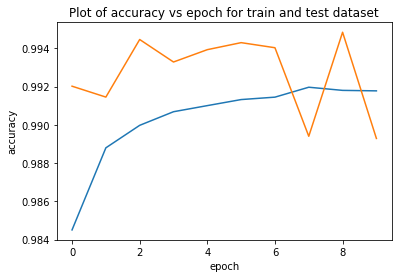

In [30]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(modelhistory.history['accuracy'])
plt.plot(modelhistory.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

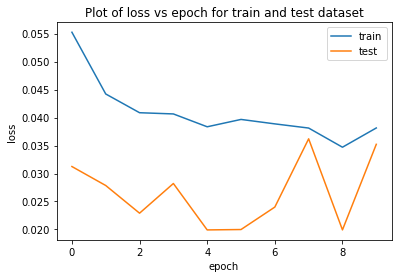

In [31]:
# Plot of loss vs epoch for train and test dataset
plt.plot(modelhistory.history['loss'])
plt.plot(modelhistory.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [32]:
cnnpredictions = cnnmodel.predict(X_test, verbose=1)
cnn_predict=np.argmax(cnnpredictions,axis=1)

y_pred = cnnmodel.predict(X_test, verbose=1)
y_pred = np.argmax(y_pred,axis=1)

#y_prob = cnnmodel.predict_proba(X_test)[:, 1]

cnn_acc = accuracy_score(y_pred, y_test)
cnn_prec = precision_score(y_pred, y_test,average='weighted')
cnn_rec = recall_score(y_pred, y_test,average='weighted')
cnn_f1 = f1_score(y_pred, y_test,average='weighted')

#storeResults('CNN',cnn_acc,cnn_prec,cnn_rec,cnn_f1)

3088/3088 [==============================] - 5s 2ms/step


In [58]:
storeResults('CNN',cnn_acc,cnn_prec,cnn_rec,cnn_f1)

# RNN

In [33]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout
from keras import regularizers
import tensorflow as tf

# define a function to build the keras model
def create_model(input_shape):
    # create model
    d = 0.25
    model = Sequential()
    
    model.add(LSTM(32, input_shape=input_shape, activation='relu', return_sequences=True))
    model.add(Dropout(d))

    model.add(LSTM(64, input_shape=input_shape, activation='relu', return_sequences=True))
    model.add(Dropout(d))
        
    model.add(LSTM(128, input_shape=input_shape, activation='relu', return_sequences=True))
    model.add(Dropout(d))

    model.add(LSTM(256, input_shape=input_shape, activation='relu', return_sequences=False))
    model.add(Dropout(d))
   
    model.add(Dense(32,kernel_initializer="uniform",activation='relu'))        
    model.add(Dense(1,kernel_initializer="uniform",activation='linear'))
    
    # compile model
    adam = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.00001)
    #model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    #model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model(input_shape=(14,1))
#print(model.summary())

In [34]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=10, batch_size=5, verbose=1, steps_per_epoch=500, validation_steps=500)

Epoch 1/10
500/500 [==============================] - 234s 433ms/step - loss: 9.9557e-08 - accuracy: 0.7852 - val_loss: 9.0265e-08 - val_accuracy: 0.8040
Epoch 2/10
500/500 [==============================] - 199s 398ms/step - loss: 9.2684e-08 - accuracy: 0.7970 - val_loss: 9.0265e-08 - val_accuracy: 0.8040
Epoch 3/10
500/500 [==============================] - 212s 424ms/step - loss: 9.6410e-08 - accuracy: 0.7907 - val_loss: 9.0265e-08 - val_accuracy: 0.8040
Epoch 4/10
500/500 [==============================] - 209s 418ms/step - loss: 8.7647e-08 - accuracy: 0.8086 - val_loss: 9.0265e-08 - val_accuracy: 0.8040
Epoch 5/10
500/500 [==============================] - 215s 431ms/step - loss: 8.3958e-08 - accuracy: 0.8181 - val_loss: 9.0265e-08 - val_accuracy: 0.8040
Epoch 6/10
500/500 [==============================] - 208s 417ms/step - loss: 9.8839e-08 - accuracy: 0.7823 - val_loss: 9.0265e-08 - val_accuracy: 0.8040
Epoch 7/10
500/500 [==============================] - 208s 416ms/step - loss

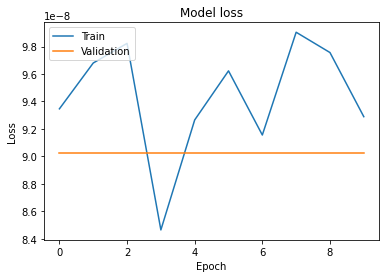

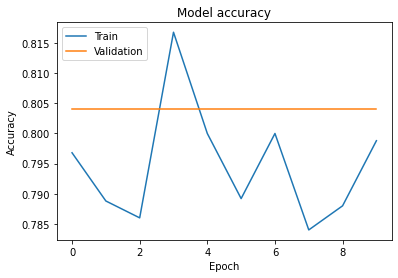

3088/3088 [==============================] - 309s 100ms/step


In [35]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss.png', format='png', dpi=1200)
plt.show()


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy.png', format='png', dpi=1200)
plt.show()

y_pred = model.predict(X_test, verbose=1)
y_pred = np.argmax(y_pred,axis=1)


#y_prob = cnnmodel.predict_proba(X_test)[:, 1]

dl_acc = accuracy_score(y_pred, y_test)
dl_prec = precision_score(y_pred, y_test,average='weighted')
dl_rec = recall_score(y_pred, y_test,average='weighted')
dl_f1 = f1_score(y_pred, y_test,average='weighted')

#storeResults('RNN',dl_acc,dl_prec,dl_rec,dl_f1)

In [59]:
storeResults('RNN',dl_acc,dl_prec,dl_rec,dl_f1)

# CNN + LSTM

In [36]:
import tensorflow as tf
tf.keras.backend.clear_session()

model_en = tf.keras.models.Sequential([tf.keras.layers.Conv1D(filters=64,kernel_size=5,strides=1,padding="causal",activation="relu",input_shape=(X_train.shape[1],X_train.shape[2])),
    tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding="valid"),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding="valid"),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(5)
])

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(5e-4,
                                                             decay_steps=1000000,
                                                             decay_rate=0.98,
                                                             staircase=False)

model_en.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.8),
              metrics=['acc'])
model_en.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 14, 64)            384       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 13, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 13, 32)            6176      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 12, 32)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 12, 128)           82432     
_________________________________________________________________
flatten (Flatten)            (None, 1536)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [37]:
modelhistory = model_en.fit(X_train, Y_train, epochs=10, verbose=verbose, validation_split=0.2, batch_size = batch_size)

Epoch 1/10
79043/79043 [==============================] - 1678s 21ms/step - loss: 0.0129 - acc: 0.9731 - val_loss: 0.0059 - val_acc: 0.9831
Epoch 2/10
79043/79043 [==============================] - 1915s 24ms/step - loss: 0.0074 - acc: 0.9852 - val_loss: 0.0048 - val_acc: 0.9859
Epoch 3/10
79043/79043 [==============================] - 2002s 25ms/step - loss: 0.0064 - acc: 0.9871 - val_loss: 0.0052 - val_acc: 0.9878
Epoch 4/10
79043/79043 [==============================] - 2007s 25ms/step - loss: 0.0058 - acc: 0.9881 - val_loss: 0.0039 - val_acc: 0.9889
Epoch 5/10
79043/79043 [==============================] - 2002s 25ms/step - loss: 0.0055 - acc: 0.9888 - val_loss: 0.0043 - val_acc: 0.9892
Epoch 6/10
79043/79043 [==============================] - 2003s 25ms/step - loss: 0.0052 - acc: 0.9891 - val_loss: 0.0039 - val_acc: 0.9887
Epoch 7/10
79043/79043 [==============================] - 1998s 25ms/step - loss: 0.0050 - acc: 0.9893 - val_loss: 0.0035 - val_acc: 0.9891
Epoch 8/10
79043/790

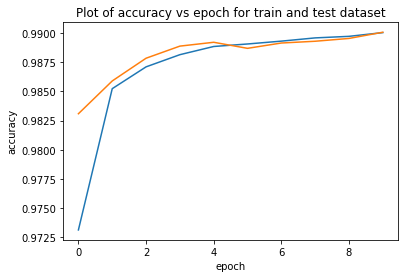

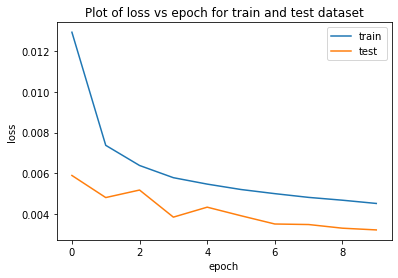

In [38]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(modelhistory.history['acc'])
plt.plot(modelhistory.history['val_acc'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# Plot of loss vs epoch for train and test dataset
plt.plot(modelhistory.history['loss'])
plt.plot(modelhistory.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [39]:
cnnpredictions = model_en.predict(X_test, verbose=1)
cnn_predict=np.argmax(cnnpredictions,axis=1)

y_pred = model_en.predict(X_test, verbose=1)
y_pred = np.argmax(y_pred,axis=1)

#y_prob = cnnmodel.predict_proba(X_test)[:, 1]

ense_acc = accuracy_score(y_pred, y_test)
ense_prec = precision_score(y_pred, y_test,average='weighted')
ense_rec = recall_score(y_pred, y_test,average='weighted')
ense_f1 = f1_score(y_pred, y_test,average='weighted')

#storeResults('CNNLSTM',ense_acc,ense_prec,ense_rec,ense_f1)

3088/3088 [==============================] - 28s 9ms/step


In [71]:
storeResults('CNN LSTM',ense_acc,ense_prec,ense_rec,ense_f1)

# RBM

In [40]:
import tensorflow as tf
tf.keras.backend.clear_session()

model1 = tf.keras.models.Sequential([tf.keras.layers.Conv1D(filters=128,kernel_size=5,strides=1,padding="causal",activation="relu",input_shape=(X_train.shape[1],X_train.shape[2])),
    tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding="valid"),
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding="valid"),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding="valid"),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128, return_sequences=True)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(5)
])

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(5e-4,
                                                             decay_steps=1000000,
                                                             decay_rate=0.98,
                                                             staircase=False)

model1.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.8),
              metrics=['acc'])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 14, 128)           768       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 13, 128)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 13, 64)            24640     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 12, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 12, 32)            6176      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 11, 32)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 11, 256)           1

In [41]:
modelhistory = model1.fit(X_train, Y_train, epochs=10, verbose=verbose, validation_split=0.2, batch_size = batch_size)

Epoch 1/10
79043/79043 [==============================] - 2398s 30ms/step - loss: 0.0121 - acc: 0.9753 - val_loss: 0.0058 - val_acc: 0.9807
Epoch 2/10
79043/79043 [==============================] - 2398s 30ms/step - loss: 0.0075 - acc: 0.9822 - val_loss: 0.0050 - val_acc: 0.9836
Epoch 3/10
79043/79043 [==============================] - 2402s 30ms/step - loss: 0.0063 - acc: 0.9867 - val_loss: 0.0041 - val_acc: 0.9883
Epoch 4/10
79043/79043 [==============================] - 1810s 23ms/step - loss: 0.0056 - acc: 0.9884 - val_loss: 0.0040 - val_acc: 0.9886
Epoch 5/10
79043/79043 [==============================] - 1786s 23ms/step - loss: 0.0052 - acc: 0.9890 - val_loss: 0.0035 - val_acc: 0.9894
Epoch 6/10
79043/79043 [==============================] - 1788s 23ms/step - loss: 0.0049 - acc: 0.9894 - val_loss: 0.0035 - val_acc: 0.9893
Epoch 7/10
79043/79043 [==============================] - 1789s 23ms/step - loss: 0.0047 - acc: 0.9898 - val_loss: 0.0033 - val_acc: 0.9900
Epoch 8/10
79043/790

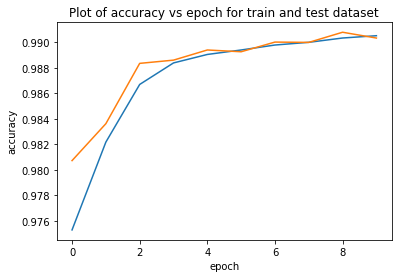

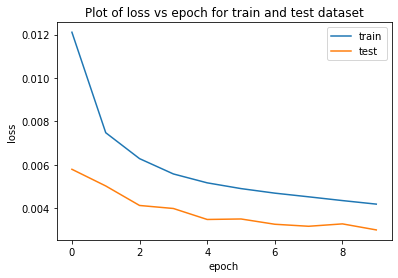

In [42]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(modelhistory.history['acc'])
plt.plot(modelhistory.history['val_acc'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# Plot of loss vs epoch for train and test dataset
plt.plot(modelhistory.history['loss'])
plt.plot(modelhistory.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [43]:
y_pred = model1.predict(X_test, verbose=1)
y_pred = np.argmax(y_pred,axis=1)

#y_prob = cnnmodel.predict_proba(X_test)[:, 1]

ext_acc = accuracy_score(y_pred, y_test)
ext_prec = precision_score(y_pred, y_test,average='weighted')
ext_rec = recall_score(y_pred, y_test,average='weighted')
ext_f1 = f1_score(y_pred, y_test,average='weighted')

3088/3088 [==============================] - 15s 5ms/step


In [60]:
storeResults('RBM',ext_acc,ext_prec,ext_rec,ext_f1)

# DNN with MLP

In [45]:
from keras.layers import Activation, Dense, Dropout, BatchNormalization, Input
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.33, random_state=1)

In [47]:
n_inputs = X_train.shape[1]

In [48]:
from sklearn.preprocessing import MinMaxScaler
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)

In [49]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization

# define encoder
visible = Input(shape=(n_inputs,))

# encoder level 1
e = Dense(n_inputs * 2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)

# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)

# bottleneck
n_bottleneck = n_inputs
bottleneck = Dense(n_bottleneck)(e)

In [50]:
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)

# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)

# output layer
output = Dense(n_inputs, activation='linear')(d)

In [51]:
# define autoencoder model
model = Model(inputs=visible, outputs=output)

In [52]:
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

In [53]:
history = model.fit(X_train, X_train, epochs=10, batch_size=2, verbose=0, validation_data=(X_test,X_test))

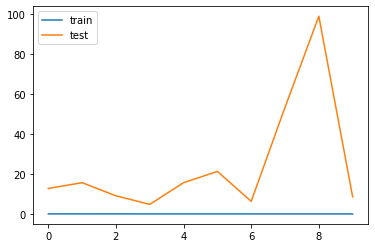

In [54]:
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot

# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [55]:
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_compress.png', show_shapes=True)

# save the encoder to file
encoder.save('encoder.h5')

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [56]:
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)
## So effectively , its like dimensinality reduction or feature extraction

# define the model
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(random_state=1, max_iter=300)  
## specifying max_iter = 200 , to avoid the CONVERGENCE WARNING
## Why do we get CONVERGENCE WARNING ?
## because the model has converged already , but our loop is still training ovwr many epochs.
## Reduce the epochs

# fit the model on the training set
model.fit(X_train_encode, y_train)

# make predictions on the test set
yhat = model.predict(X_test_encode)

# calculate classification accuracy
acc = accuracy_score(y_test, yhat)

In [57]:
dnn_acc = accuracy_score(y_test, yhat)
dnn_prec = precision_score(y_test, yhat,average='weighted')
dnn_rec = recall_score(y_test, yhat,average='weighted')
dnn_f1 = f1_score(y_test, yhat,average='weighted')

In [61]:
storeResults('DNN',dnn_acc,dnn_prec,dnn_rec,dnn_f1)

# Comparison

In [72]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'Precision': precision,
                        'Recall'   : recall,
                        'F1-Score': f1score
                      })

In [73]:
result

,ML Model,Accuracy,Precision,Recall,F1-Score
0,CNN,0.989,0.994,0.989,0.991
1,RNN,0.793,1.000,0.793,0.885
2,RBM,0.991,0.993,0.991,0.992
3,DNN,0.994,0.994,0.994,0.994
4,CNN LSTM,1.000,0.993,0.990,0.992


# Graph

In [74]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

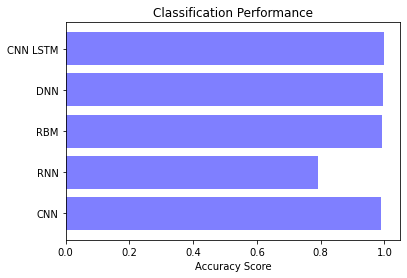

In [75]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

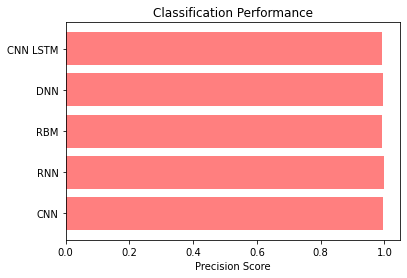

In [76]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

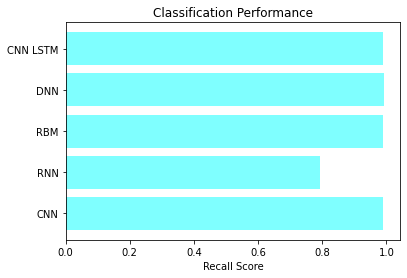

In [77]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='cyan')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 SCore

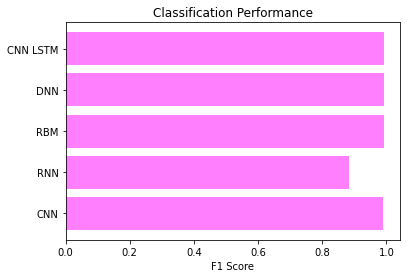

In [78]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='magenta')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

In [79]:
model_en.save('kddcup.h5')